<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/deeplearning.ai/nlp/c1_w4_hashfunctions_multiplanes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hash functions and multiplanes

A key point for the lookup using hash functions is the calculation of the hash key or bucket id that we assign for a given entry. In this notebook, we will cover:

- Basic hash tables
- Multiplanes
- Random planes

# Basic Hash Tables

Hash tables are data structures that allo indexing data to make lookup tasks more efficient. In this part, you will see the implementation of the simplest hash function.

In [1]:
import numpy as np
import pprint
import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter(indent=4)

In [2]:
# Procedure to plot and arrows that represents vectors with pyplot
def plot_vectors(vectors, colors=['k', 'b', 'r', 'm', 'c'], axes=None, fname='image.svg', ax=None):
    scale = 1
    scale_units = 'x'
    x_dir = []
    y_dir = []
    
    for i, vec in enumerate(vectors):
        x_dir.append(vec[0][0])
        y_dir.append(vec[0][1])
    
    if ax == None:
        fig, ax2 = plt.subplots()
    else:
        ax2 = ax
      
    if axes == None:
        x_axis = 2 + np.max(np.abs(x_dir))
        y_axis = 2 + np.max(np.abs(y_dir))
    else:
        x_axis = axes[0]
        y_axis = axes[1]
        
    ax2.axis([-x_axis, x_axis, -y_axis, y_axis])
        
    for i, vec in enumerate(vectors):
        ax2.arrow(0, 0, vec[0][0], vec[0][1], head_width=0.05 * x_axis, head_length=0.05 * y_axis, fc=colors[i], ec=colors[i])
    
    if ax == None:
        plt.show()
        fig.savefig(fname)

In the next cell, we will define a straightforward hash function for integer numbers. The function will receive a list of integer numbers and the desired amount of buckets. The function will produce a hash table stored as a dictionary, where keys contain the hash keys, and the values will provicde the hashed elements of the input list.

In [10]:
def basic_hash_table(value_l, n_buckets):
  def hash_function(value, n_buckets):
    return int(value) % n_buckets

  hash_table = {i:[] for i in range(n_buckets)}
  for value in value_l:
    hash_value = hash_function(value, n_buckets)
    hash_table[hash_value].append(value)
  return hash_table

In [11]:
value_l = [100, 10, 14, 17, 97]
hash_table_example = basic_hash_table(value_l, n_buckets=10)
pp.pprint(hash_table_example)

{   0: [100, 10],
    1: [],
    2: [],
    3: [],
    4: [14],
    5: [],
    6: [],
    7: [17, 97],
    8: [],
    9: []}


In this case, the bucket key must be the rightmost digit of each number.

## Planes

Multiplanes hash functions are other type of hash functions. Multiplanes hash functions are based on the idea of numbering every single region that is formed by the intersection of n planes. In the following code, we shoe the most basic forms of the multiplanes principle. First, with a single plane:

In [15]:
np.random.uniform(-2, 2, 2)

array([-0.82835697, -1.50144403])

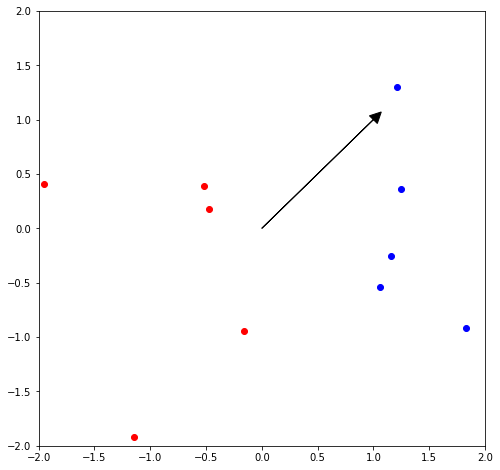

In [18]:
P = np.array([[1, 1]])
fig, ax1 = plt.subplots(figsize=(8, 8))
plot_vectors([P], axes=[2,2], ax=ax1)
for i in range(0, 10):
  v1 = np.array(np.random.uniform(-2, 2, 2))
  side_of_plane = np.sign(np.dot(P, v1.T))

  # color the points depending on the sign of the result of np.dot
  if side_of_plane == 1:
    ax1.plot([v1[0]], [v1[1]], 'bo')
  else:
    ax1.plot([v1[0]], [v1[1]], 'ro')